<a href="https://colab.research.google.com/github/Alexander-Schiendorfer/colab-notebooks/blob/master/01_basic_data_loading_sktime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sktime.utils.data_processing import (
    from_3d_numpy_to_nested,
    from_multi_index_to_3d_numpy,
    from_nested_to_3d_numpy,
    is_nested_dataframe
)


In [ ]:
# sktime uses data in dimensions (m, d, t) where 
# m ... is the number of distinct instances in the panel
# d ... is the number of features/variables that are measured
# t ... is the number of time steps

test_series = np.array([4, 7, 11, 3, 12, 5, 20, 16])
test_series = np.reshape(test_series, (1,1,len(test_series)))
X = from_3d_numpy_to_nested(test_series)
print(test_series.shape)

print(f"X_nested is a nested DataFrame: {is_nested_dataframe(X)}")
print(f"The cell contains a {type(X.iloc[0,0])}.")
print(f"The nested DataFrame has shape {X.shape}")
X.head()

(1, 1, 8)
X_nested is a nested DataFrame: True
The cell contains a <class 'pandas.core.series.Series'>.
The nested DataFrame has shape (1, 1)


,var_0
0,0 4 1 7 2 11 3 3 4 12 5 ...


In [ ]:
print(X.iloc[0,0])

0     4
1     7
2    11
3     3
4    12
5     5
6    20
7    16
dtype: int64


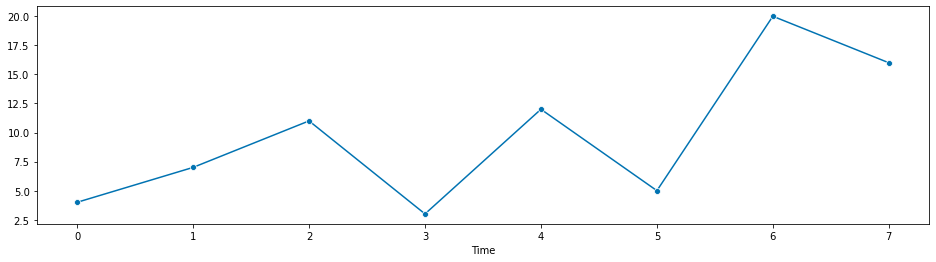

In [ ]:
from sktime.utils.plotting import plot_series
fig, ax = plot_series(X.iloc[0,0])
ax.set(xlabel="Time");

Now for a single multivariate time series

In [ ]:
test_series = np.array([[4, 7, 11, 3, 12, 5, 20, 16], [8, 2, 5, 4, 7, 1, 3, 4]])
#test_series = np.reshape(test_series, (1, 1, len(test_series)))
X = np.expand_dims(test_series, axis = 0)
print(X.shape)
X = from_3d_numpy_to_nested(X)
print(test_series.shape)

print(f"X_nested is a nested DataFrame: {is_nested_dataframe(X)}")
print(f"The cell contains a {type(X.iloc[0,0])}.")
print(f"The nested DataFrame has shape {X.shape}")
X.head()

(1, 2, 8)
(2, 8)
X_nested is a nested DataFrame: True
The cell contains a <class 'pandas.core.series.Series'>.
The nested DataFrame has shape (1, 2)


,var_0,var_1
0,0 4 1 7 2 11 3 3 4 12 5 ...,0 8 1 2 2 5 3 4 4 7 5 1 6 ...


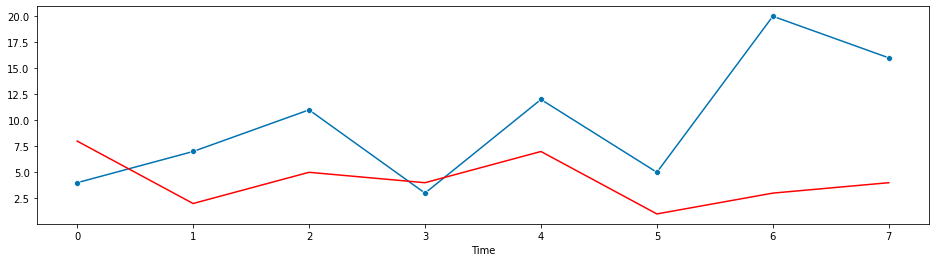

In [ ]:
fig, ax = plot_series(X.iloc[0,0])
ax.set(xlabel="Time");
ax.plot(X.iloc[0,1], 'r')

And finally, two multivariate time series



In [ ]:
test_series1 = np.array([[4, 7, 11, 3, 12, 5, 20, 16], [8, 2, 5, 4, 7, 1, 3, 4]])
test_series2 = np.array([[2, 5, 3, 9, 11, 5, 10, 12], [4, 3, 3, 5, 8, 2, 1, 6]])

#test_series = np.reshape(test_series, (1, 1, len(test_series)))
X = np.zeros((2, 2, test_series1.shape[1]))
X[0,:,:] = test_series1
X[1,:,:] = test_series2
print(X.shape)
X = from_3d_numpy_to_nested(X)
print(test_series.shape)

print(f"X_nested is a nested DataFrame: {is_nested_dataframe(X)}")
print(f"The cell contains a {type(X.iloc[0,0])}.")
print(f"The nested DataFrame has shape {X.shape}")
X.head()

(2, 2, 8)
(2, 8)
X_nested is a nested DataFrame: True
The cell contains a <class 'pandas.core.series.Series'>.
The nested DataFrame has shape (2, 2)


,var_0,var_1
0,0 4.0 1 7.0 2 11.0 3 3.0 4 1...,0 8.0 1 2.0 2 5.0 3 4.0 4 7.0 5...
1,0 2.0 1 5.0 2 3.0 3 9.0 4 1...,0 4.0 1 3.0 2 3.0 3 5.0 4 8.0 5...


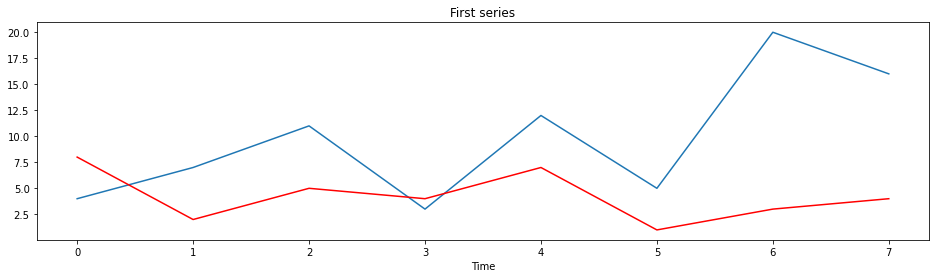

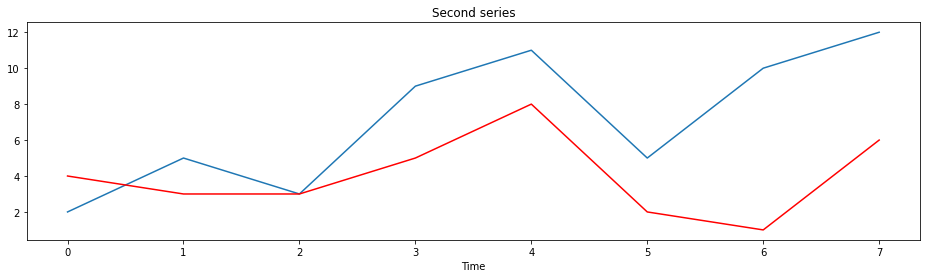

In [ ]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
ax.plot(X.iloc[0,0])
ax.plot(X.iloc[0,1], 'r')
ax.set(xlabel="Time", title ="First series");

fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
ax.plot(X.iloc[1,0])
ax.plot(X.iloc[1,1], 'r')
ax.set(xlabel="Time", title = "Second series");
